# Notebook Challenge 2: van biologisch naar artificieel systeem

## Implementatie van biologisch geïnspireerde AI

### Aanvulling/aanpassing op eerder geïmplementeerde agent-based simulation
Hier is gekozen om een deel van het afweersysteem te ontwikkelen. Er is allereerst een `HelperNanite` geïmplementeerd die als taak heeft om de omgeving af te zoeken naar zieke vertices.
Tijdens het zoeken kan de `HelperNanite` gebruik maken van het feit dat een zieke vertex last heeft van inflammatie en dat de vertex om deze reden hitte afgeeft.
De hitte heeft impact op de directe buur-vertices die op hun beurt ook warm worden (maar wel minder warm ten opzichte van de zieke vertex).
De `HelperNanite` kan deze hitte gebruiken om te zoeken naar zieke vertices.

Wanneer de `HelperNanite` een zieke vertex gevonden heeft, wilt de `HelperNanite` dit zo snel mogelijk doorgeven aan de `NaniteFactory`.
De `NaniteFactory` representeerd een lymfeknoop en bevindt zich altijd op één vaste vertex in het lichaam.
De `NaniteFactory` gaat bij dit signaal allereerst kijken of de specifieke ziekte al bij de vertex behandeld wordt.
Als dat zo is, dan hoeft de `NaniteFactory` verder niets te doen.
Wanneer de desbetreffende ziekte nog niet wordt behandeld bij de zieke vertex, wordt er gekeken of de ziekte al eerder voortgekomen is  bij de `NaniteFactory` (bestaan er nog Tc-geheugencellen voor).
Zo ja, dan kan de `NaniteFactory` direct een `KillerNanite` op de zieke vertex afsturen.
Zo nee, dan zal de `NaniteFactory` eerst een antigen moeten produceren en wordt de `KillerNanite` pas één stap later op pad gestuurd.

De `KillerNanite` zal op zijn beurt afreizen naar het door de `NaniteFactory` verkregen doel. Dit doet de `KillerNanite` op basis van het kortse pad.
De `KillerNanite` is in staat om specifiek de door de `NaniteFactory` gemelde ziekte te stoppen bij de zieke vertex.
De `KillerNanite` is niet in staat om onderweg vertices met dezelfde of andere ziekten te helen.
Zodra de `KillerNanite` de desbetreffende zieke vertex heeft bereikt, geneest deze de zieke vertex direct.
Vervolgens stuurt de `KillerNanite` een BloodTooth signaal naar de `NaniteFactory` dat de zieke vertex is genezen.
De taak van de `KillerNanite` zit erop en deze raakt in de vergetelheid van de `NaniteFactory` en het lichaam.

### Experimentatie op effect aanpassingen

Het lichaam bestaat uit veertien vertices. De `NaniteFactory` kan op iedere vertex geplaats worden.
Ook de vertex waar de `NaniteFactory` zich bevindt, kan ziek raken. Iedere zieke vertex vermindert het aantal hitpoints van het lichaam met één
gedurende iedere stap. In de experimenten wordt gemeten hoelang het lichaam overleeft.
Tijdens ieder experiment wisselt enkel de `NaniteFactory` van positie, de overige parameters blijven onveranderd.
Op deze manier trachten wij de beste locatie in het lichaam te bepalen voor de `NaniteFactory`. Immers, hoe langer het lichaam in leven blijft, hoe beter.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
from loan.batchrunner import run_batch
import loan.helpers as helpl 

df = run_batch(use_mp=False)

1400it [00:17, 79.39it/s]


In [3]:
df.head()

,factory_location,Run,End time,Hitpoints,Ill vertices,Vertices healed,N,network
0,1,0,66,-2,"[13, 12, 6]",6,1,"(1, 2, 3, 6, 4, 7, 9, 10, 11, 12, 14, 13, 8, 5)"
1,1,1,82,0,"[12, 9, 13]",6,1,"(1, 2, 3, 6, 4, 7, 9, 10, 11, 12, 14, 13, 8, 5)"
2,1,2,48,-2,"[14, 12, 9, 10]",3,1,"(1, 2, 3, 6, 4, 7, 9, 10, 11, 12, 14, 13, 8, 5)"
3,1,3,59,-3,"[14, 7, 11, 13]",7,1,"(1, 2, 3, 6, 4, 7, 9, 10, 11, 12, 14, 13, 8, 5)"
4,1,4,81,-2,"[14, 11, 6]",7,1,"(1, 2, 3, 6, 4, 7, 9, 10, 11, 12, 14, 13, 8, 5)"


In [4]:
df.groupby(["factory_location"]).mean().sort_values(["End time"], ascending=False)

,Run,End time,Hitpoints,Vertices healed,N
factory_location,,,,,
8,749.5,70.07,-0.16,8.18,1.0
7,649.5,67.82,0.48,7.77,1.0
6,549.5,67.75,-0.33,7.48,1.0
9,849.5,67.19,0.08,7.47,1.0
3,249.5,67.05,-0.55,7.26,1.0
11,1049.5,66.89,-1.00,6.99,1.0
5,449.5,66.61,-0.62,7.28,1.0
2,149.5,66.60,0.12,6.95,1.0
13,1249.5,66.33,-0.88,7.38,1.0


## Plotten van de resultaten
Allereerst wordt de representatie van het lichaam getoond.

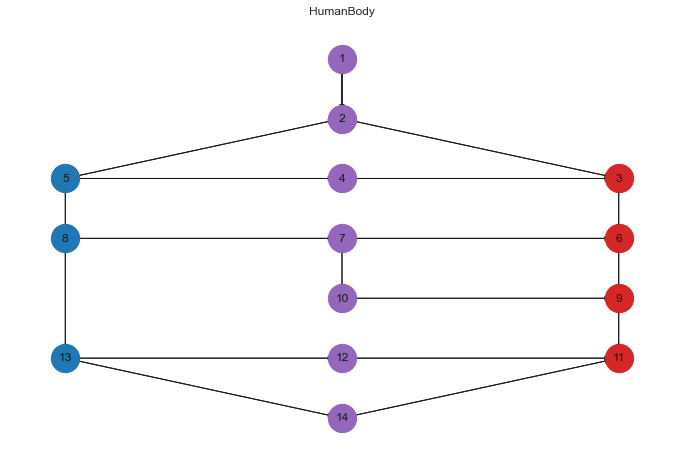

In [5]:
graph = helpl.graph_from_json(r"./loan/data/network.json")
plt.figure(figsize=(12,8))
helpl.plot_graph(graph)

### plotting the results of the experiment

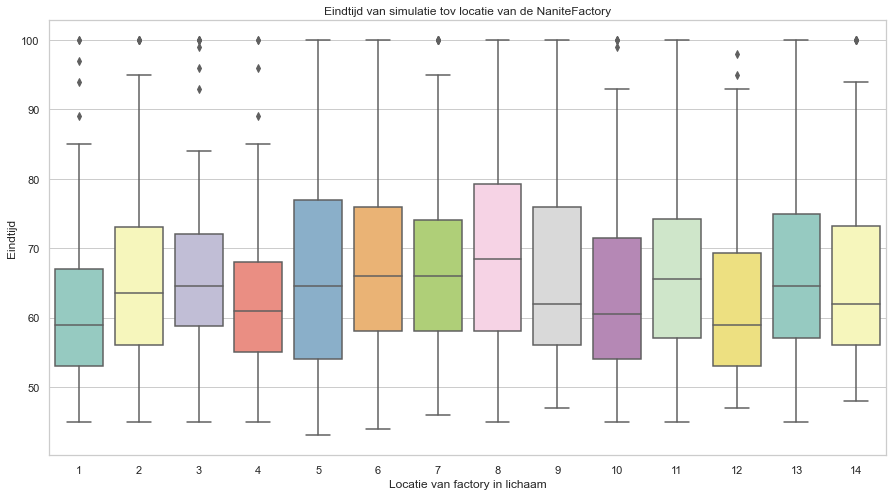

In [6]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="factory_location", y="End time",
                 data=df, palette="Set3")
ax.set_title("Eindtijd van simulatie tov locatie van de NaniteFactory")
ax.set_xlabel("Locatie van factory in lichaam")
ax.set_ylabel("Eindtijd")
plt.show()

## Beschouwing van de impact van het werk

### Hoe verhouden jouw experimenten zich toch experimenten in je bronnen? Is het een uitbreiding, verdieping, herhaling, etc?
Allereerst wordt in de experimenten uit de paper van 'Hart, E., & Davoudani, D. (2011)' een grid gebruikt als omgeving van de simulatie,
waar wij gebruik maken van een Netwerk Grid.
In de paper wordt ingezoomd op een klein stukje van het lichaam, waar in onze simulatie de stromen door het gehele menselijk lichaam worden gesimuleerd.
De focus in de paper gelegd op het herkennen en onthouden van bepaalde ziektes,
en het muteren van cellen om bepaalde ziektes te herkennen.
Wij nemen dit gedeelte ook mee in onze simulatie, echter bouwen we ook vernietiging van ziektes in.
Daarmee is onze simulatie een uitbreiding op de simulatie uit de paper van 'Hart, E., & Davoudani, D. (2011)'.
Onze simulatie is voor nu ook nog single-agent based i.p.v. multi-agent based.

### Welke relatie zie je tussen de resultaten van jouw experimenten en je bronnen? Verklaar die relatie.
In de paper van Hart & Davoudani wordt het lymfesysteem vanuit een engineering-kant bekeken.
Hierbij is een model ontwikkeld waarin de complexe immunologische processen in een lichaam vereenvoudigd zijn om hieruit een prototype te vervaardigen.
Dit model kan, alhoewel het biologisch niet geheel accuraat is, gebruikt worden om te helpen in de ontwikkeling van dit soort systemen.
In de paper worden echter geen expliciete experimenten uitgevoerd.  
Op de website van Kanker.nl wordt aangegeven dat door het hele lichaam lymfeklieren aanwezig zijn.
Verder zijn er op verschillende plekken in het lichaam groepen lymfeklieren. Zo zitten er belangrijke groepen lymfeklieren in de hals, langs de luchtpijp, in de oksels, bij de longen, in de buikholte, in het bekken en in de liezen.  
Alhoewel wij hier geen bron voor hebben kunnen vinden kan hier geobserveerd worden dat deze 'belangrijke' groepen zich redelijk centraal in het lichaam bevinden.
In de resultaten valt te zien dat dat het lichaam over het algemeen minder lang leeft wanneer de `vertex` die zich helemaal bovenin bevindt (vertex 1) de node is waar de `NaniteFactory` zich bevindt.
Buiten dit valt er geen significant bewijs te leveren dat de plaats van een `NaniteFactory` uitmaakt voor de levensduur van het lichaam.

### Hoe zou jouw simulatie gebruikt worden in nader onderzoek naar artificiële en/of biologische intelligentie?

Toekomstig onderzoek is gebaat bij het bepalen van de ideale positie voor de `NaniteFactory`. Ondanks dat het fysiek nog onmogelijk is om nanites
te fabriceren en te injecteren in het lichaam, kan het gedrag van deze nanites wel al onderzocht worden. In deze simulatie wordt de biologische
intelligentie van het immuunsysteem uitgebreid met artificiële intelligentie van de verschillende nanites. De `NaniteFactory` kan gericht
`KillerNanites` sturen naar zieke vertices en deze doen aan perfecte pathfinding. Toekomstig onderzoek moet uitwijzen of fysieke nanites in
hetzelfde in staat zijn. De mate van intelligentie die fysiek past in de kleine nanites is onderwerp van verder onderzoek.

## Verwijzingen
- Hart, E., & Davoudani, D. (2011). An Engineering-Informed Modelling Approach to AIS. Lecture Notes in Computer Science, 240–253. https://www.napier.ac.uk/~/media/worktribe/output-202676/icaris20111pdf.pdf
- Binas, 5de druk:
    - 84L Immuniteit
    - 84N Lymfevaten en lymfoïde organen
- Wikipedia-bijdragers. (2021, 2 maart). Lymfevatenstelsel. Wikipedia. https://nl.wikipedia.org/wiki/Lymfevatenstelsel
- Kanker.nl. (z.d.). Lymfestelsel. Geraadpleegd op 4 maart 2021, van https://www.kanker.nl/gevolgen-van-kanker/lymfoedeem/wat-is/lymfestelsel